In [2]:
from IPython.display import Image

In [12]:
import numpy as np
import matplotlib.pyplot as plt

- references
    - https://www.youtube.com/watch?v=RsuSOylfN2I

|                     | PostLN         | PreLN          |
|---------------------|----------------|----------------|
| Training difficulty | More difficult | Less difficult |
| Performance         | Better         | Worse          |

## skip connection 与 lr warmup 

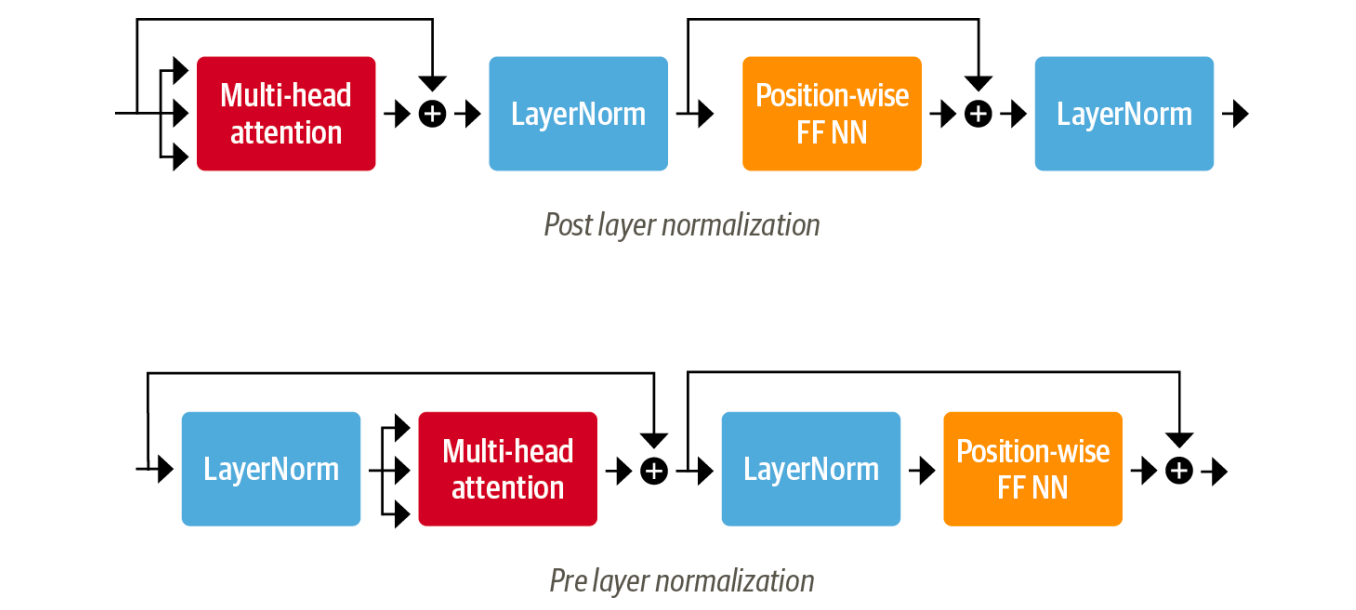

In [26]:
Image('../imgs/layer_norm_pos.png', width=500)

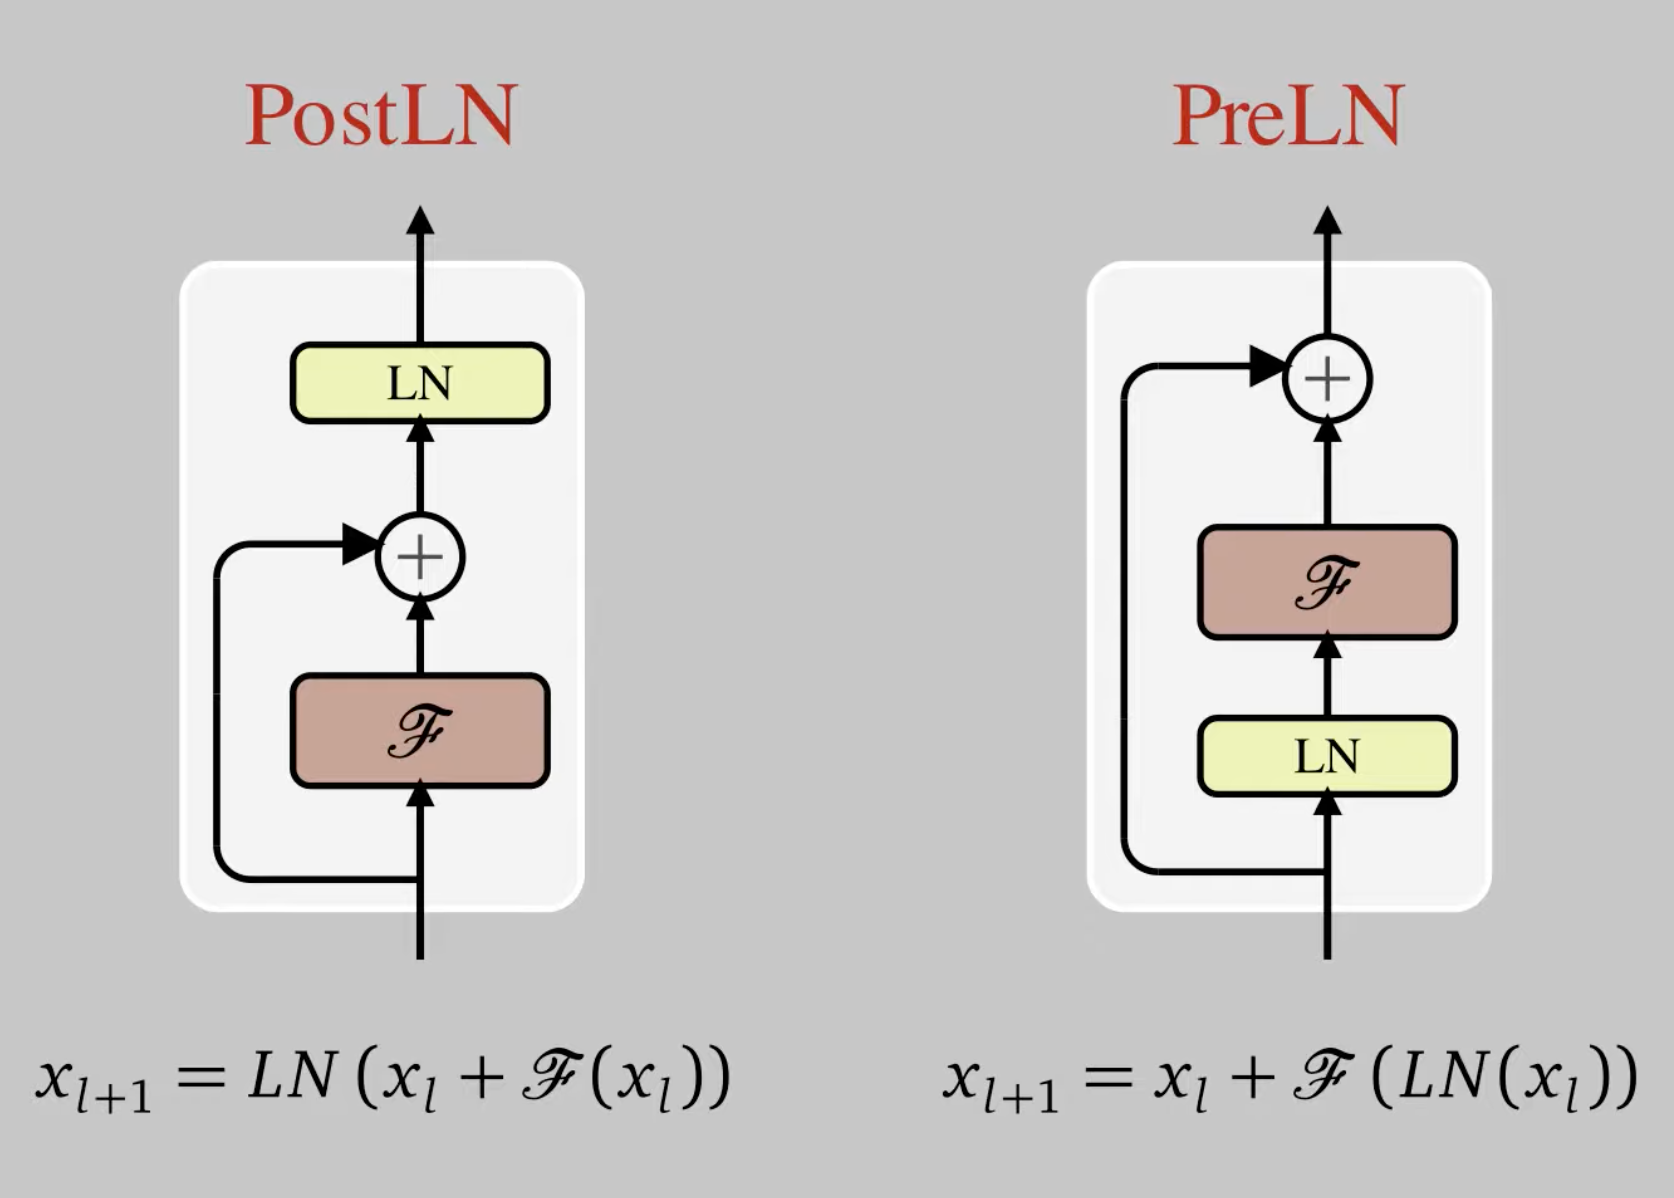

In [30]:
# F: MHA or FFN
Image('../imgs/ln_post_pre.png', width=400)

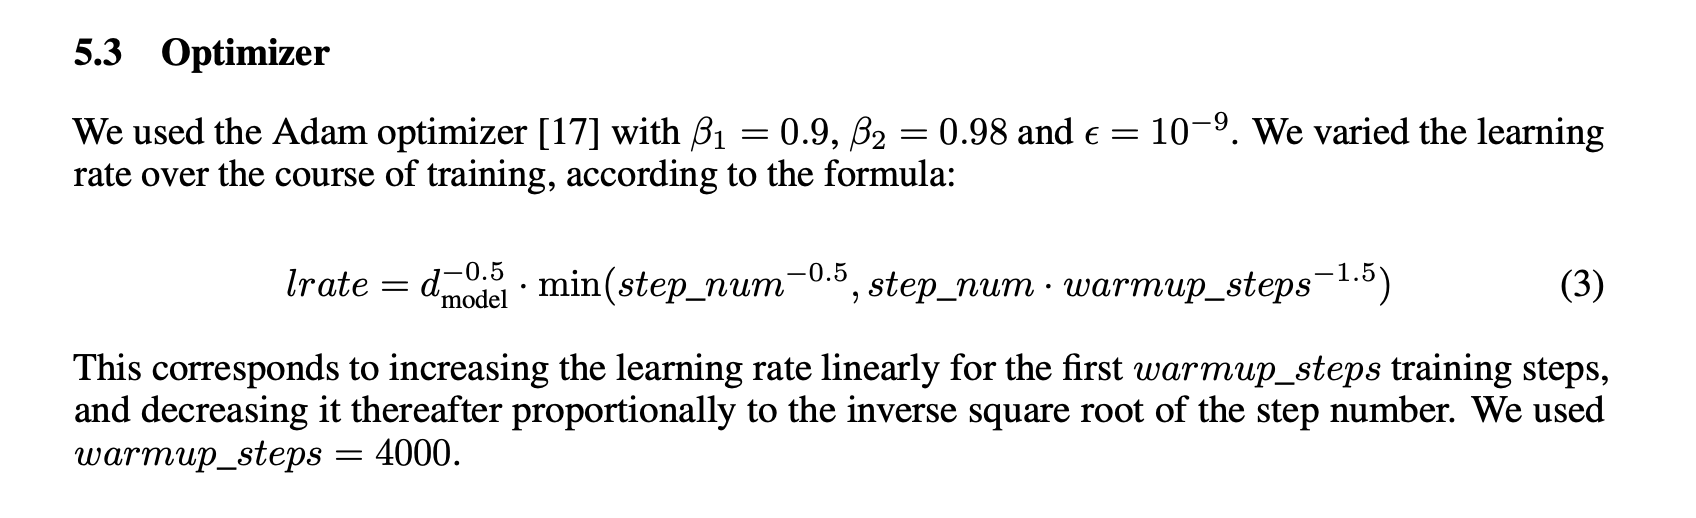

In [7]:
# https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf
Image('../imgs/warmup_scheduler.png', width=600)

$$
wr^{-1.5}\cdot n, \quad n < wr, \quad \text{linear}\\
n^{-1/2}, \quad n \geq wr, \quad \text{exp}
$$

In [22]:
d_model = 768
warmup_steps = 4000
lr_list = []

for n in range(1, 20000):
    lr = d_model**0.5 * min(1/np.sqrt(n), n*np.power(warmup_steps, -1.5))
    lr_list.append(lr)

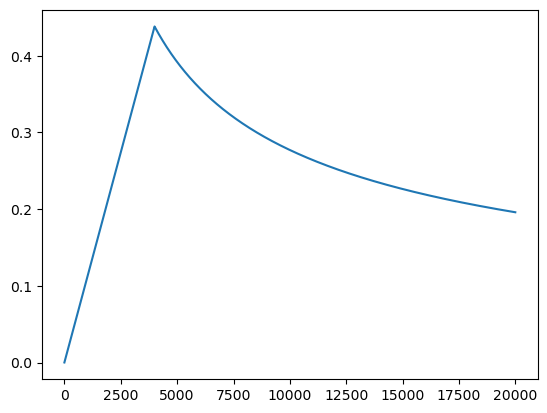

In [23]:
plt.plot(lr_list)

## why we need warmup stage

- On Layer Normalization in the Transformer Architecture
    - warmup stage is a practical solution；
        - Using a large learning rate at the beginning leads to unstable training
        - Using a small learning rate causes slow and inefficient training
    - Unbalanced gradients
        - Large gradients near the output-layer => Exploding gradients
        - Gradient-norms decay exponentially in the backward pass
            - => Small gradients near the input-layer
            - => Vanishing gradients in deep networks
